In [1]:
from datetime import datetime

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL.ImageOps import scale
from zmq.backend import second


In [2]:
# Load the data
links = pd.read_csv("./wikispeedia_paths-and-graph/wikispeedia_paths-and-graph/links.tsv", sep="\t", skiprows= 11, names = ["source", "target"])



In [3]:
# create a directed graph
graph = nx.from_pandas_edgelist(links, source="source", target="target", create_using=nx.DiGraph)
page_rank = nx.pagerank(graph)

In [4]:
finished_paths = pd.read_csv("./clean_finished_paths.csv", sep=",")
# add column of ranks to the finished paths for each path
finished_paths["path"] = finished_paths["path"].apply(lambda x: [p[1:-1] for p in x[1:-1].replace(" ", "").split(",")])
finished_paths.head()
#remove backpaths
def remove_backpaths(path):
    new_path = []
    # reverse the path
    path = path[::-1]
    counter = 0
    for page in path:
        if page == "<":
            counter += 1
            continue
        if counter > 0:
            counter -= 1
            continue
        new_path.append(page)
    return new_path[::-1]
finished_paths["clean_path"] = finished_paths["path"].apply(remove_backpaths)
finished_paths.head(80)

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, 15th_century, 16th_century, Pac..."
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_..."
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Niger, Nigeria, British_Empire,..."
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']",['Countries'],History,Countries,"[14th_century, Renaissance, Ancient_Greece, Gr..."
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']","['Geography', 'European_Geography', 'European_...",History,Geography,"[14th_century, Renaissance, Ancient_Greece, Gr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,12470aee3d5ad152,2012-08-05 17:08:48,23,"[2005_Atlantic_hurricane_season, Cape_Verde, P...",-1,3,0,3,2005_Atlantic_hurricane_season,Lisbon,"['Geography', 'Storms']","['Geography', 'European_Geography']",Geography,Geography,"[2005_Atlantic_hurricane_season, Cape_Verde, P..."
76,1d7fe6405a2f92a1,2009-11-16 23:51:02,136,"[2005_Atlantic_hurricane_season, International...",2,5,0,5,2005_Atlantic_hurricane_season,William_McKinley,"['Geography', 'Storms']","['People', 'USA_Presidents']",Geography,People,"[2005_Atlantic_hurricane_season, International..."
77,566cf09824091017,2012-08-02 08:43:28,65,"[2005_Atlantic_hurricane_season, United_States...",-1,3,0,3,2005_Atlantic_hurricane_season,William_McKinley,"['Geography', 'Storms']","['People', 'USA_Presidents']",Geography,People,"[2005_Atlantic_hurricane_season, United_States..."
78,05a8d2911e44275a,2013-06-21 03:20:29,111,"[2005_Atlantic_hurricane_season, George_W._Bus...",-1,3,0,3,2005_Atlantic_hurricane_season,William_McKinley,"['Geography', 'Storms']","['People', 'USA_Presidents']",Geography,People,"[2005_Atlantic_hurricane_season, George_W._Bus..."


In [5]:
# add column of ranks to the finished paths for each path
finished_paths["ranks"] = finished_paths["clean_path"].apply(lambda x: [page_rank.get(page,-1) for page in x])
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path,ranks
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, 15th_century, 16th_century, Pac...","[0.000595641037442582, 0.0009319474059595194, ..."
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_...","[0.000595641037442582, 0.006339517036740152, 0..."
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Niger, Nigeria, British_Empire,...","[0.000595641037442582, 0.00037553623914707735,..."
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']",['Countries'],History,Countries,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0..."
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']","['Geography', 'European_Geography', 'European_...",History,Geography,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70855,15a13a1d66ef5456,2012-10-03 02:23:35,66,"[Yagan, Ancient_Egypt, Civilization]",-1,2,0,2,Yagan,Civilization,"['People', 'Historical_figures']","['Citizenship', 'Culture_and_Diversity']",People,Citizenship,"[Yagan, Ancient_Egypt, Civilization]","[3.714962213413337e-05, 0.0010641050499469898,..."
70856,2ef7ac844cefda58,2011-03-16 05:42:18,165,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent...",3,8,1,6,Yagan,Fiction,"['People', 'Historical_figures']","['Language_and_literature', 'Literature_types']",People,Language_and_literature,"[Yagan, Folklore, 19th_century, Charles_Dicken...","[3.714962213413337e-05, 0.00034700374638433864..."
70857,12863abb7887f890,2013-11-22 04:42:52,228,"[Yagan, Australia, England, France, United_Sta...",-1,6,0,6,Yagan,U.S._Open_%28tennis%29,"['People', 'Historical_figures']","['Everyday_life', 'Sports_events']",People,Everyday_life,"[Yagan, Australia, England, France, United_Sta...","[3.714962213413337e-05, 0.003204271399017423, ..."
70858,19f8284371753362,2011-02-27 07:42:47,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1,3,0,3,Yarralumla%2C_Australian_Capital_Territory,Abraham_Lincoln,"['Geography', 'Geography_of_Oceania_Australasia']","['People', 'USA_Presidents']",Geography,People,"[Yarralumla%2C_Australian_Capital_Territory, A...","[3.6708860049547024e-05, 0.003204271399017423,..."


In [6]:
def get_hub(path, ranks):
    return path[np.argmax(ranks)]

finished_paths["hub"] = finished_paths.apply(lambda x: get_hub(x["clean_path"], x["ranks"]), axis=1)
        
finished_paths.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path,ranks,hub
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, 15th_century, 16th_century, Pac...","[0.000595641037442582, 0.0009319474059595194, ...",Africa
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_...","[0.000595641037442582, 0.006339517036740152, 0...",Europe
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Niger, Nigeria, British_Empire,...","[0.000595641037442582, 0.00037553623914707735,...",Africa
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']",['Countries'],History,Countries,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0...",Greece
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']","['Geography', 'European_Geography', 'European_...",History,Geography,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0...",Greece


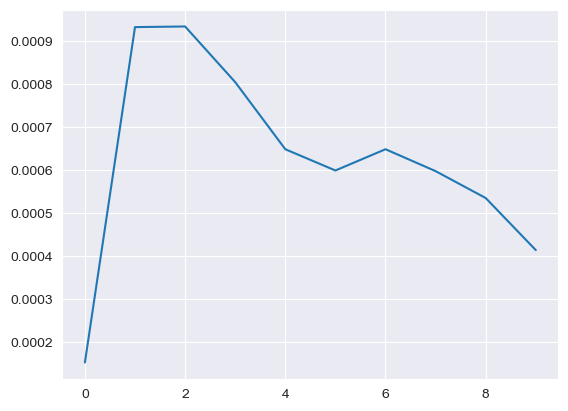

In [7]:
paths_to_plot = finished_paths[finished_paths["path_length"] == 10]["ranks"]
means = []
for i in range(10):
    means.append(np.median([path[i] for path in paths_to_plot]))
plt.plot(means)
plt.show()



In [8]:
# divide the periods into 3 months
from datetime import datetime

categories = pd.read_csv("./clean_categories.csv")
categories["article"] = categories["article"].apply(lambda x: x)
categories["category"] = categories["category"].apply(lambda x: x[1:-1].replace(" ", "").split(","))
categories_dict = {}
for index, row in categories.iterrows():
    categories_dict[row["article"]] = row["category"][0][1:-1]

finished_paths["hub_category"] = finished_paths["hub"].apply(lambda x: categories_dict.get(x, "None"))
finished_paths.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,source_general_category,target_general_category,clean_path,ranks,hub,hub_category
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, 15th_century, 16th_century, Pac...","[0.000595641037442582, 0.0009319474059595194, ...",Africa,Geography
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Europe, Africa, Atlantic_slave_...","[0.000595641037442582, 0.006339517036740152, 0...",Europe,Geography
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']",History,History,"[14th_century, Niger, Nigeria, British_Empire,...","[0.000595641037442582, 0.00037553623914707735,...",Africa,Geography
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']",['Countries'],History,Countries,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0...",Greece,Geography
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']","['Geography', 'European_Geography', 'European_...",History,Geography,"[14th_century, Renaissance, Ancient_Greece, Gr...","[0.000595641037442582, 0.001027839966330342, 0...",Greece,Geography


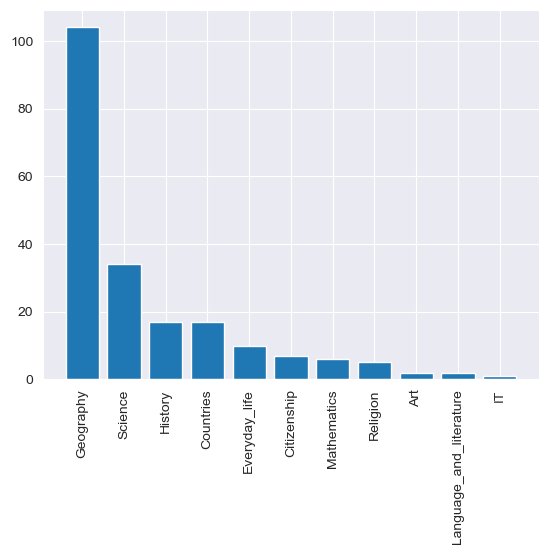

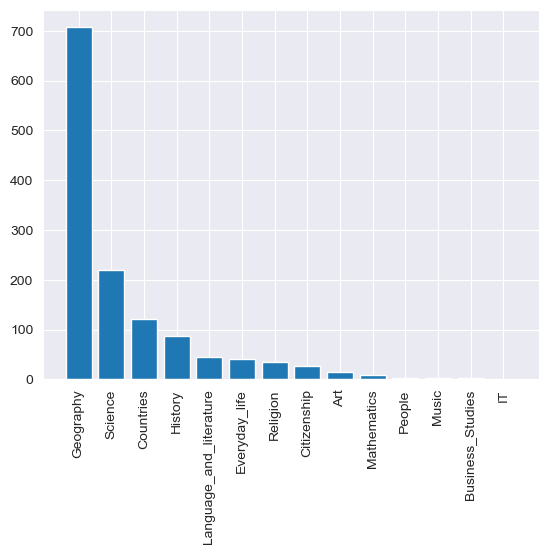

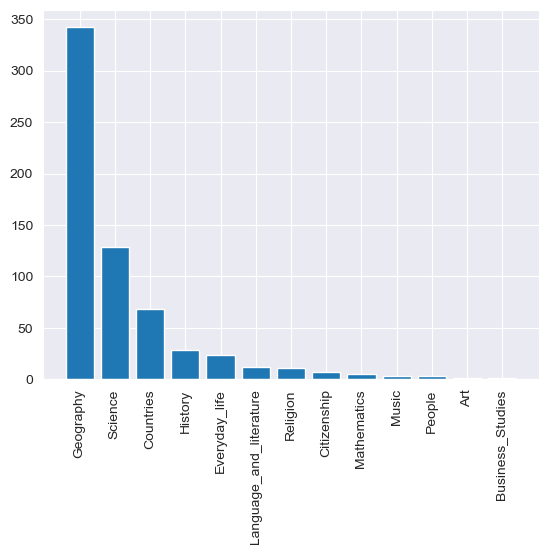

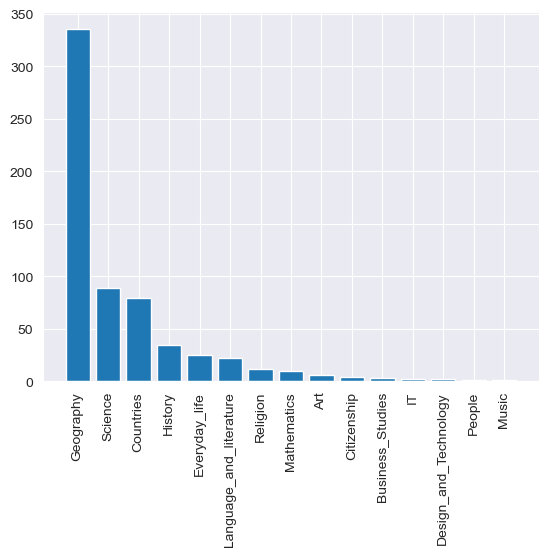

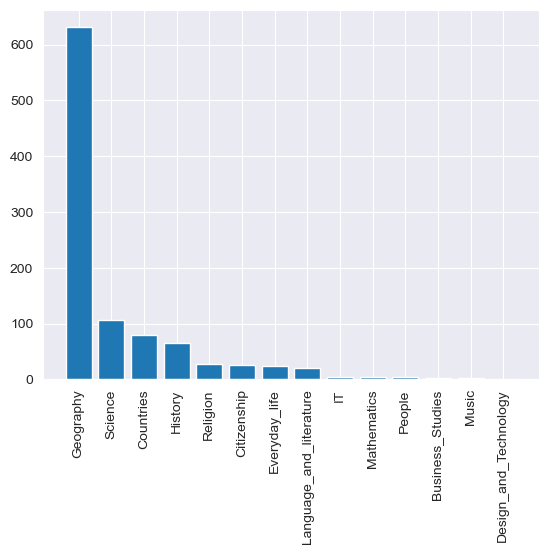

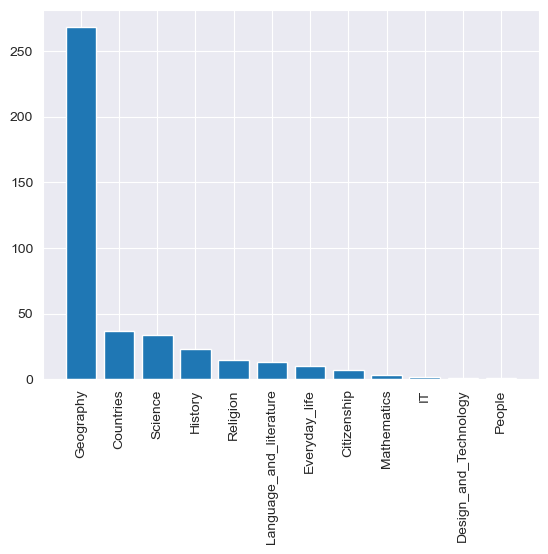

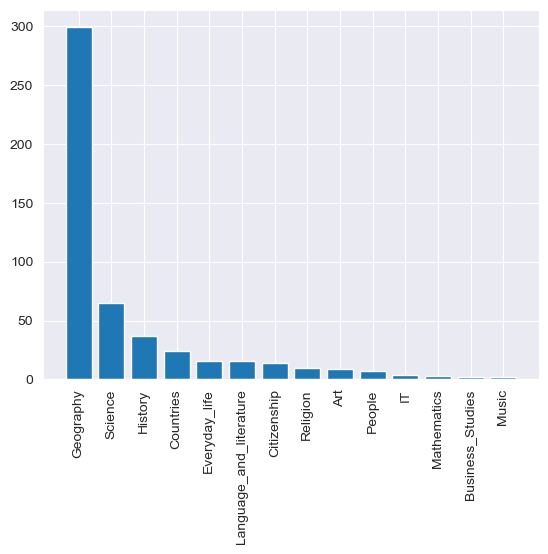

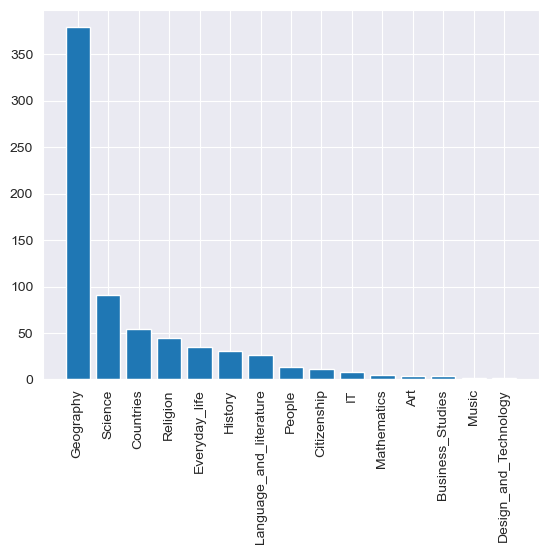

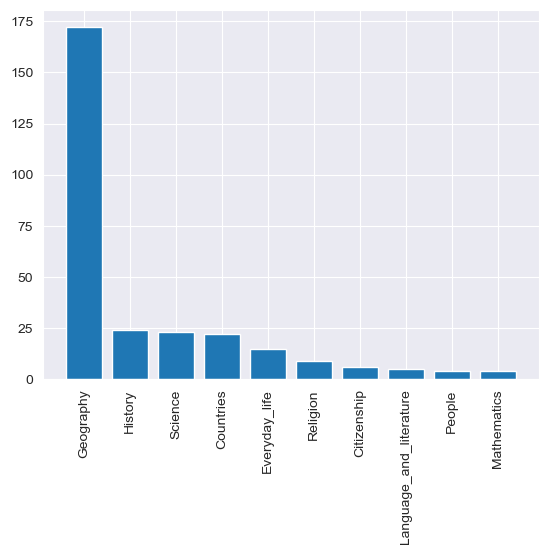

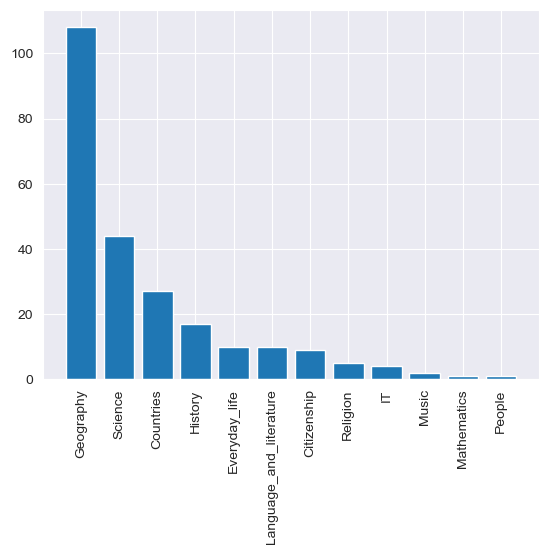

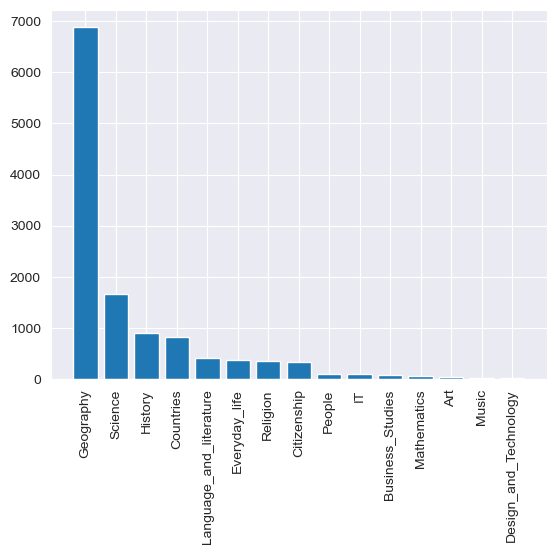

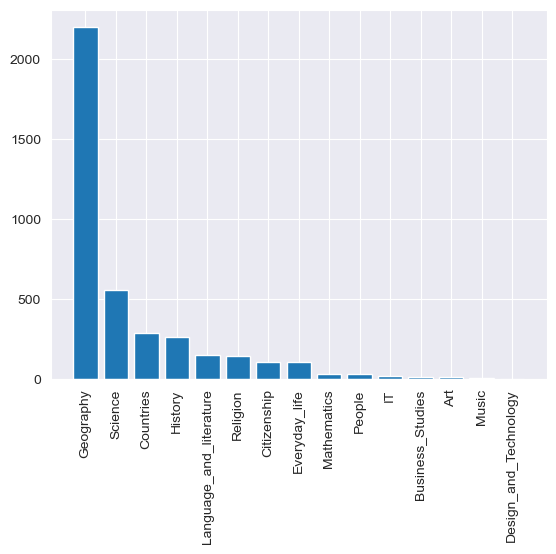

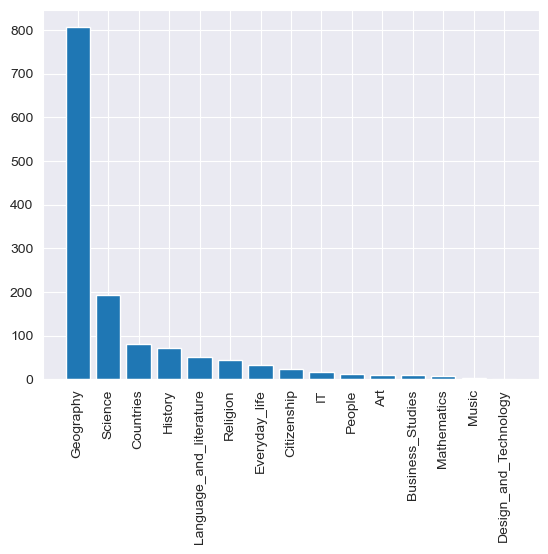

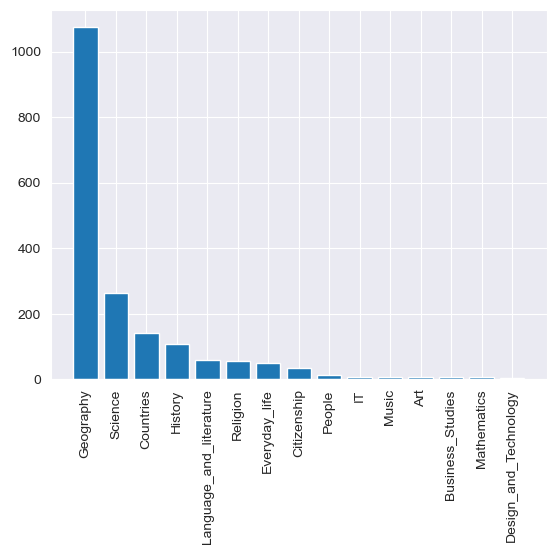

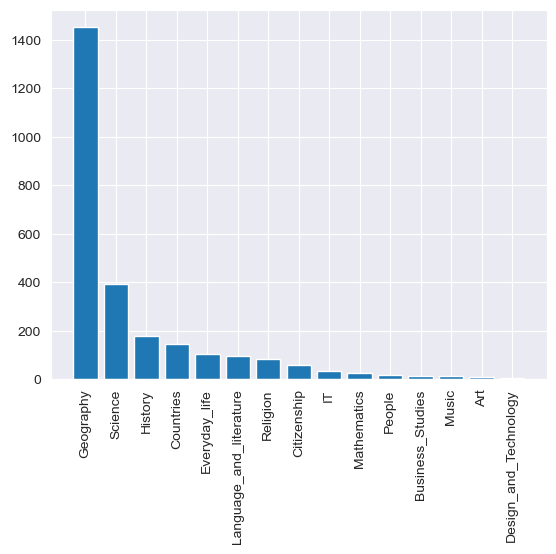

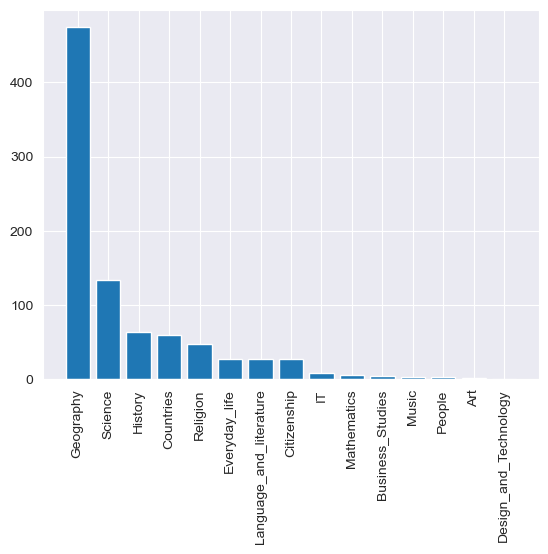

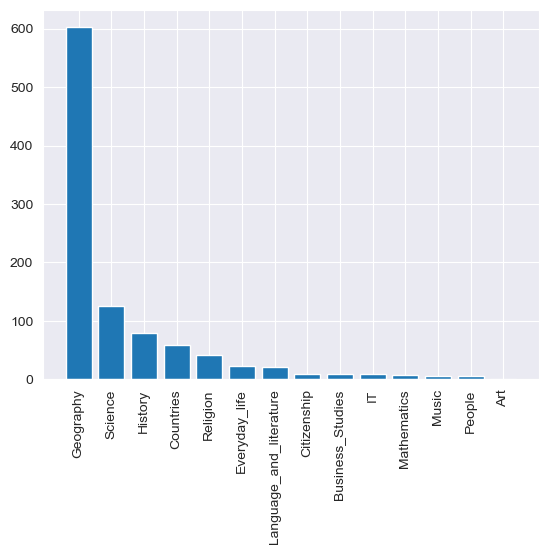

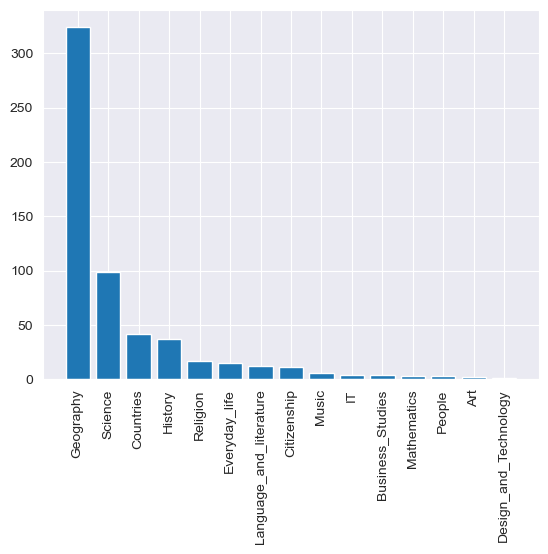

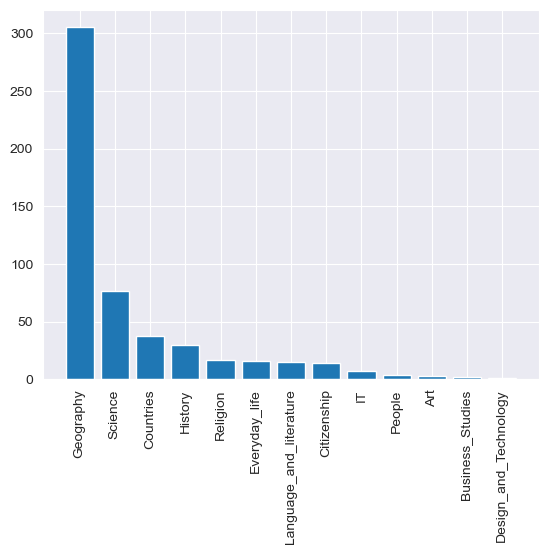

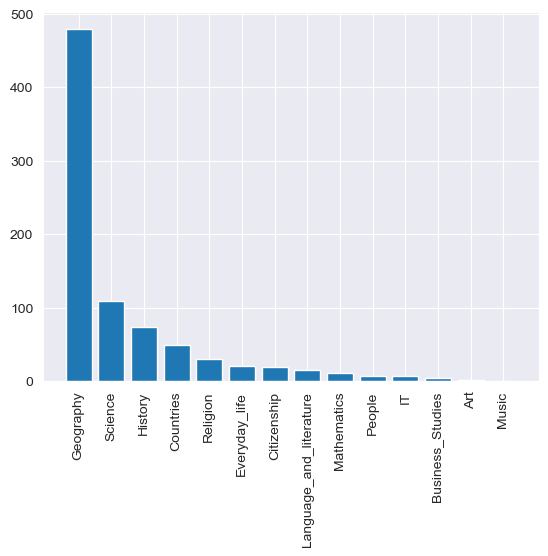

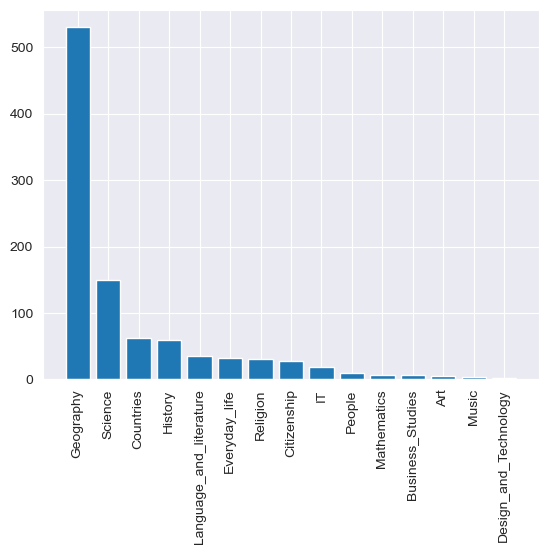

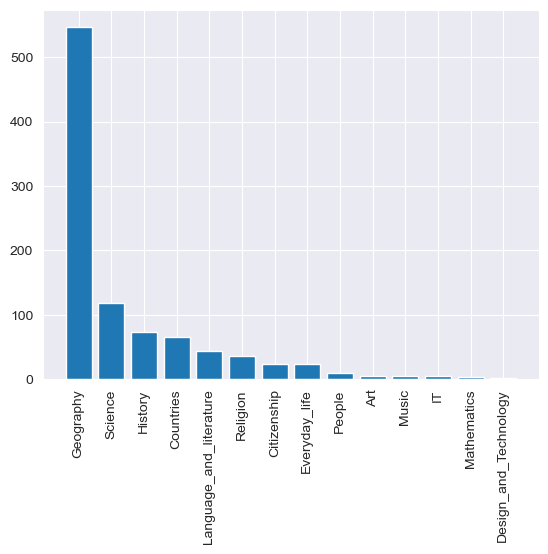

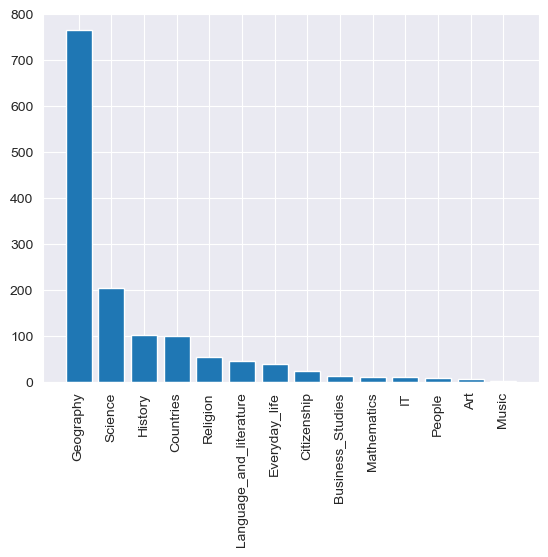

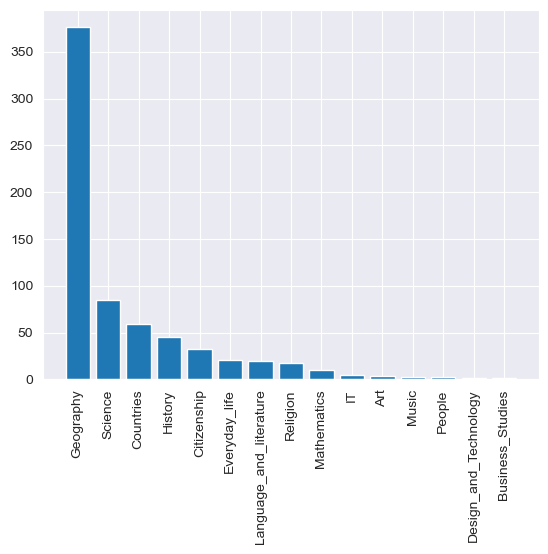

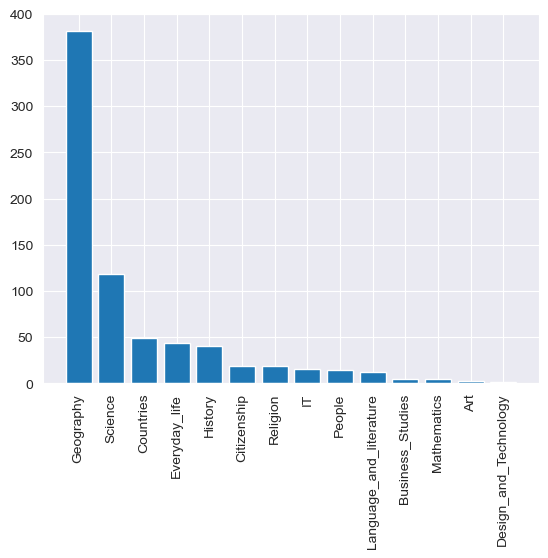

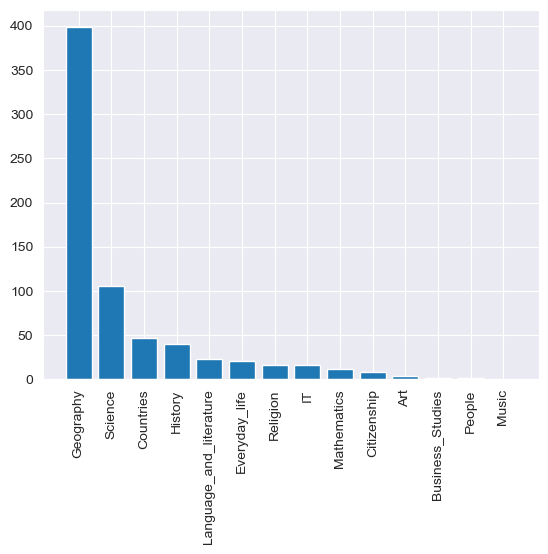

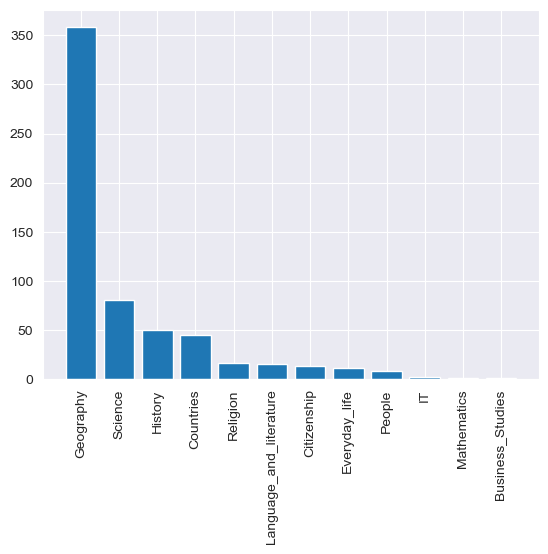

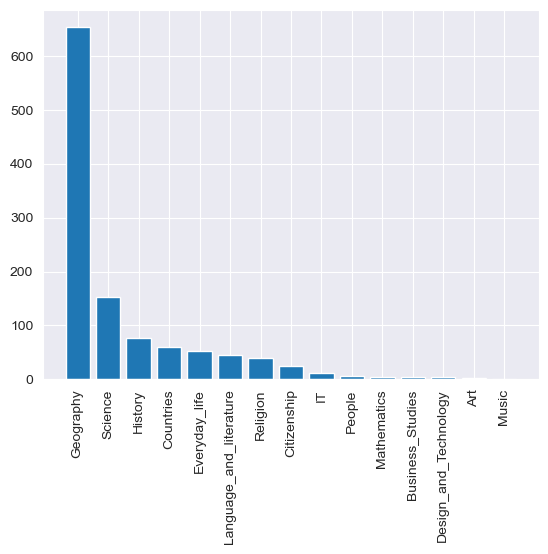

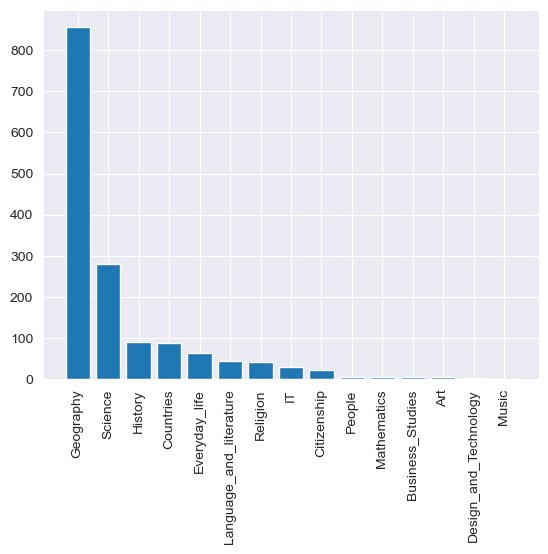

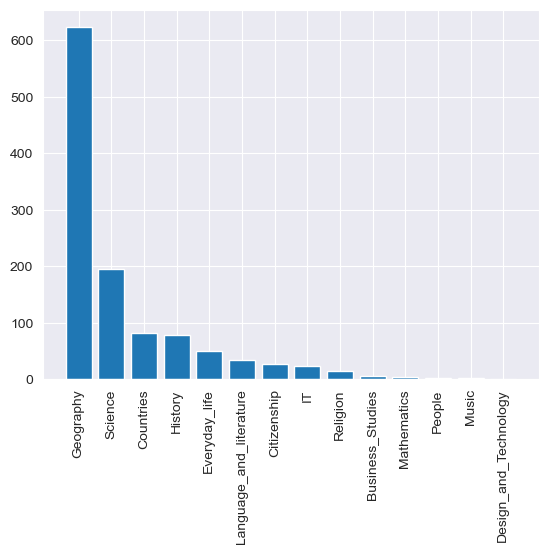

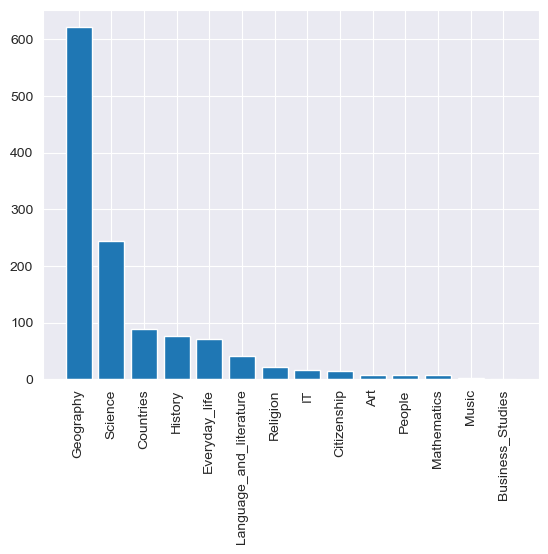

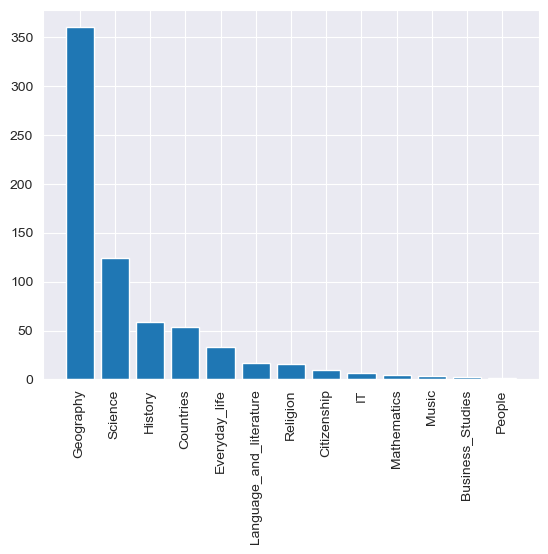

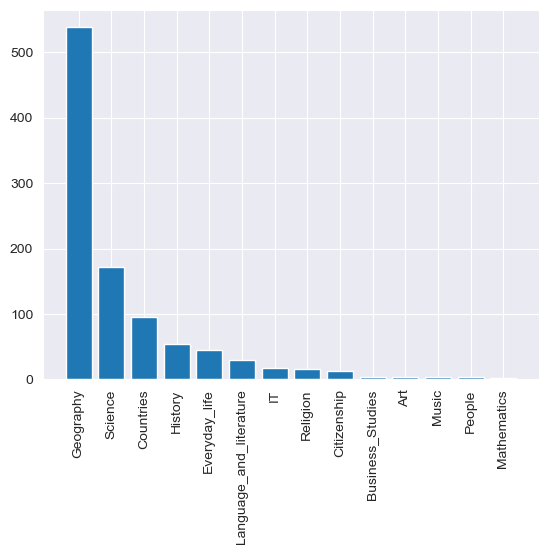

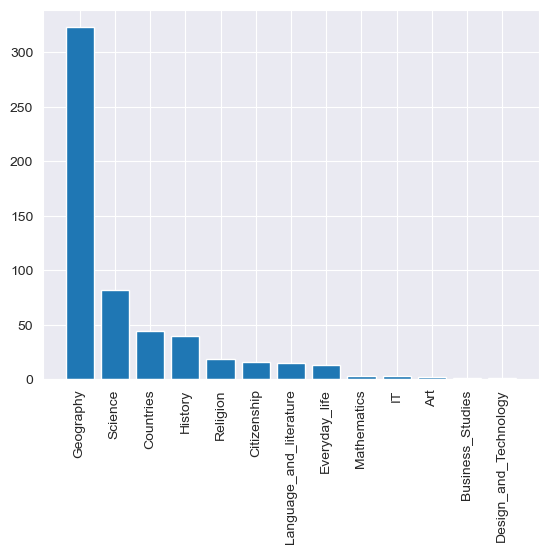

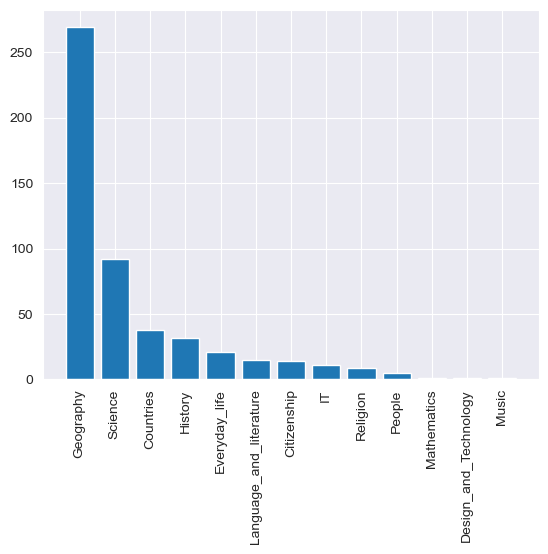

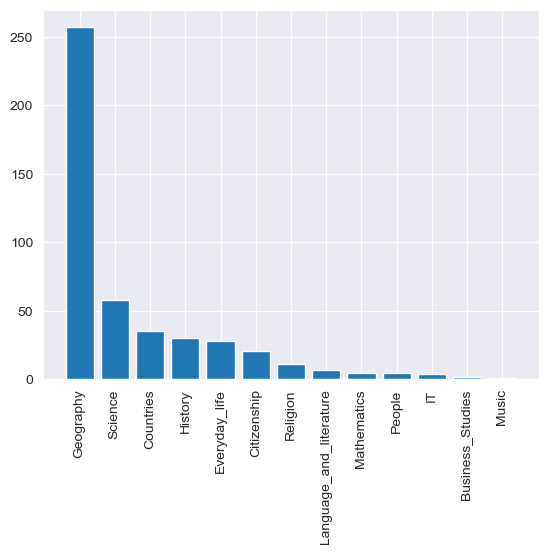

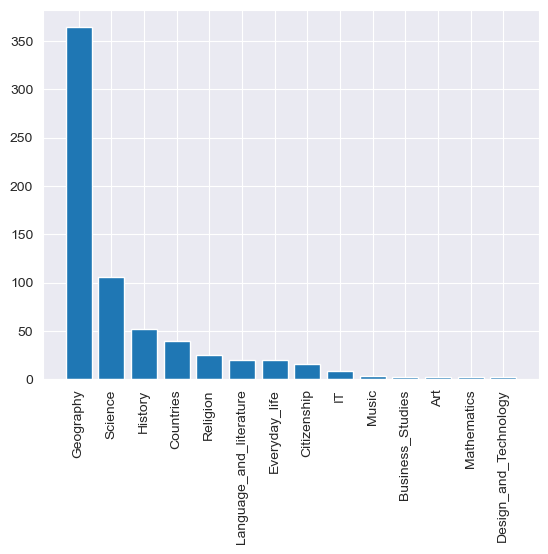

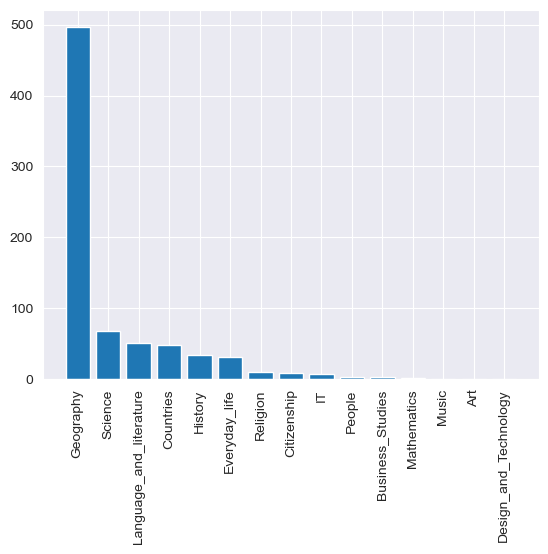

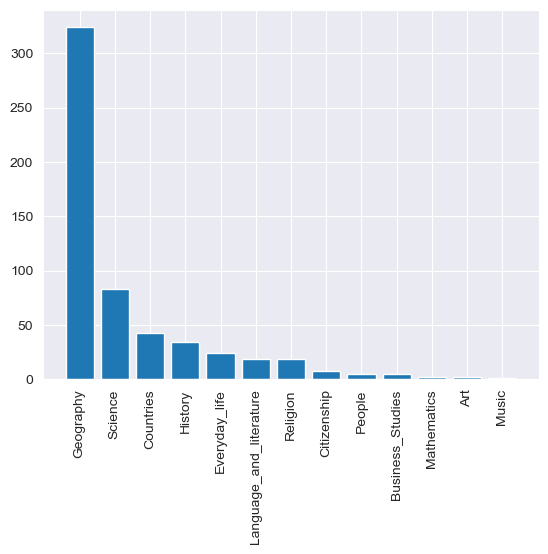

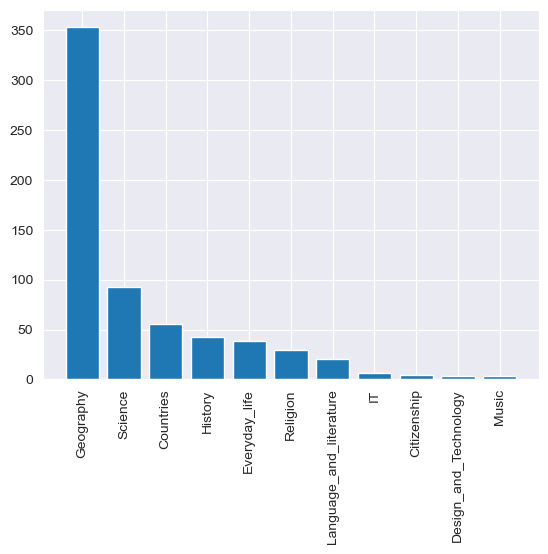

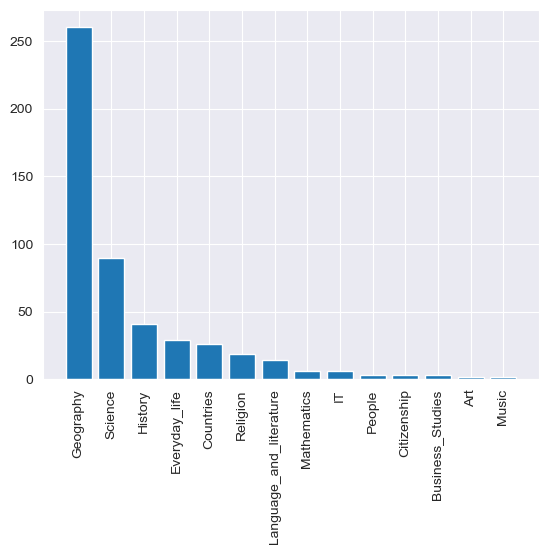

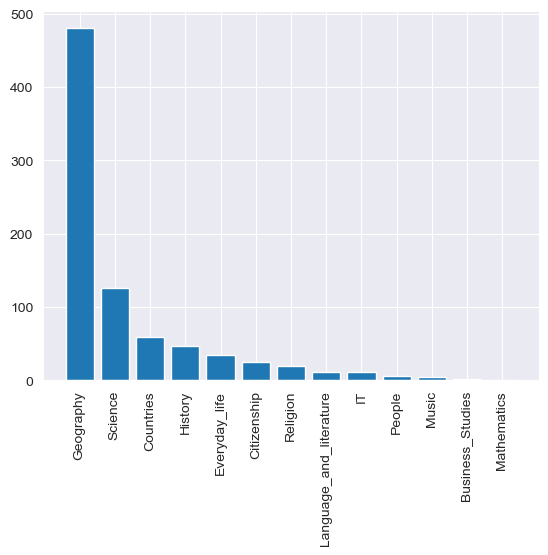

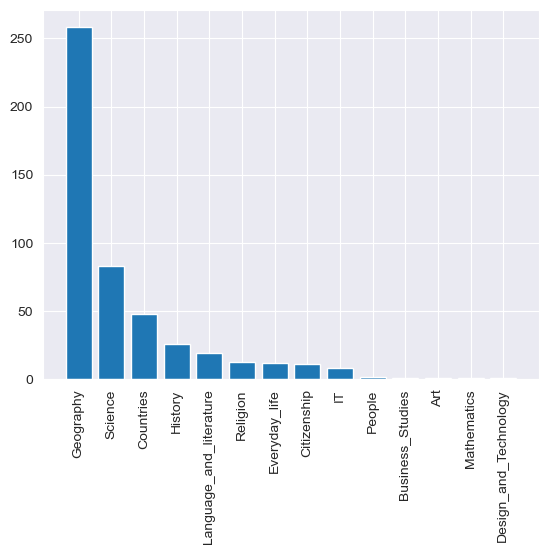

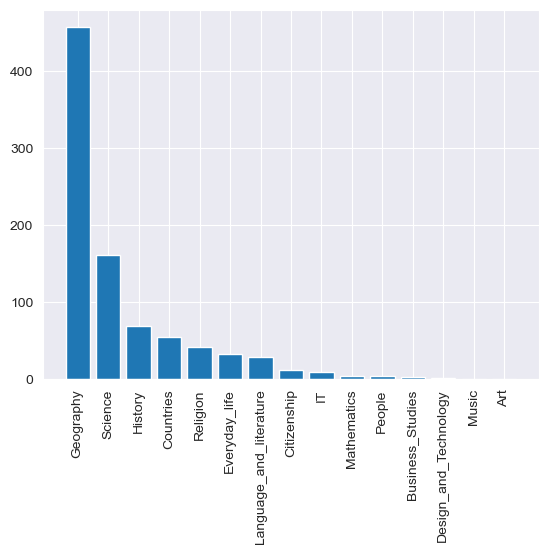

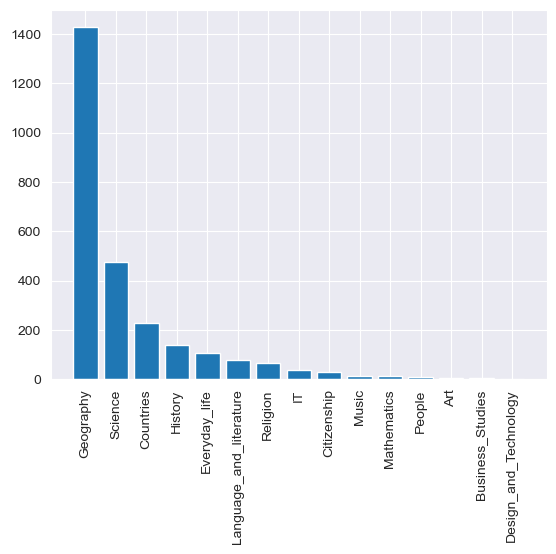

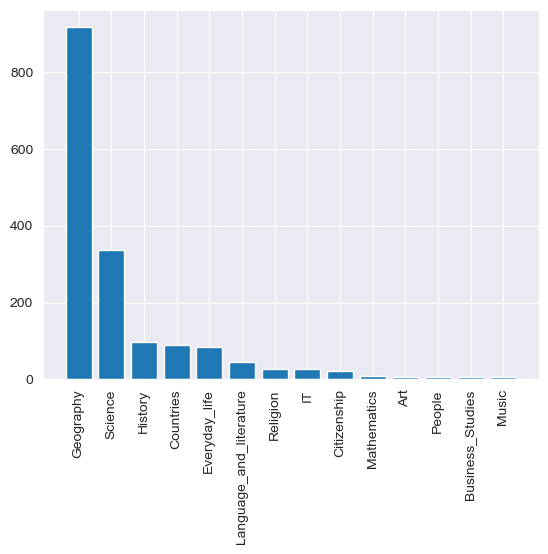

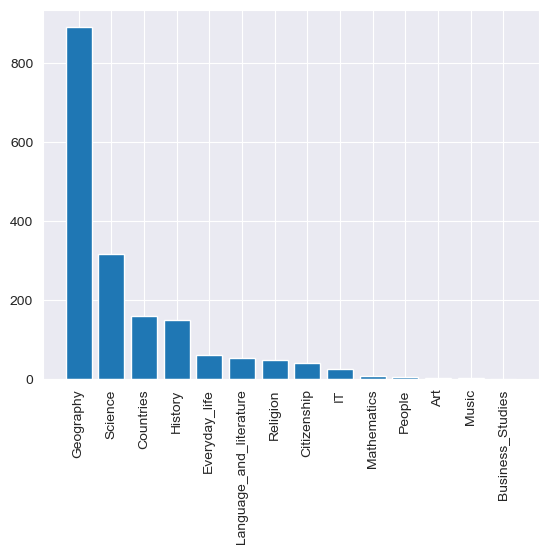

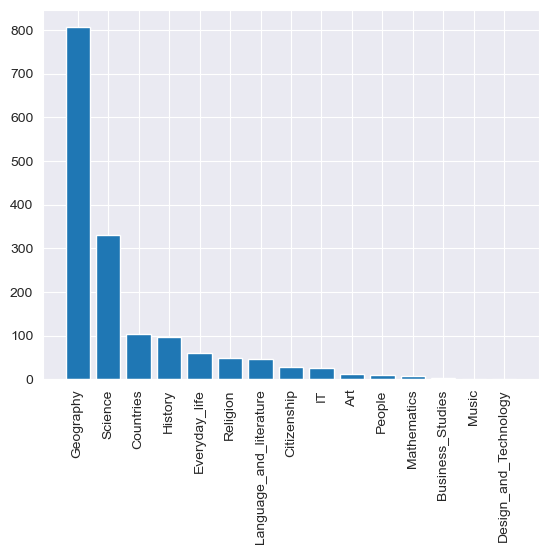

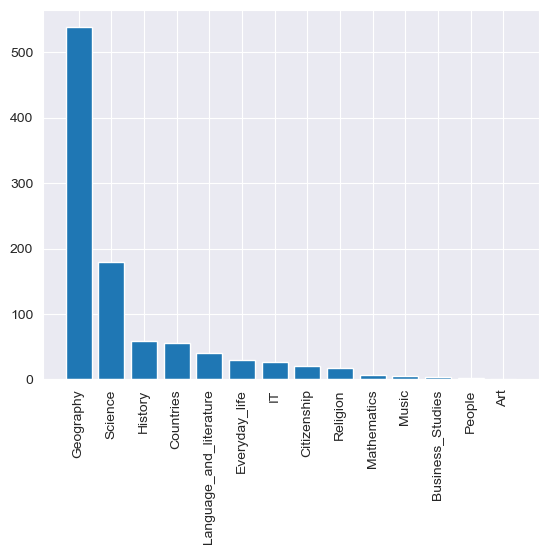

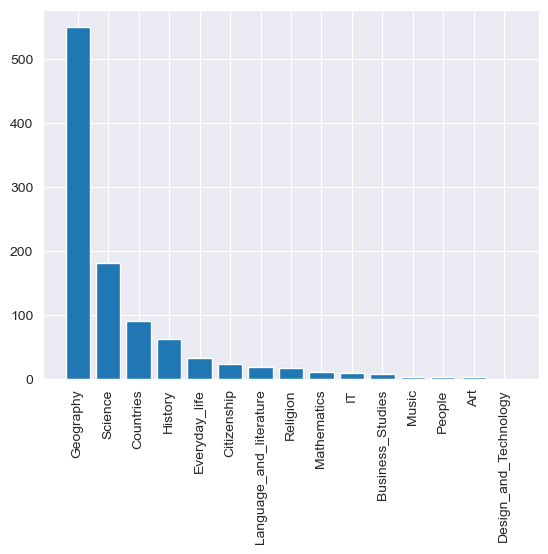

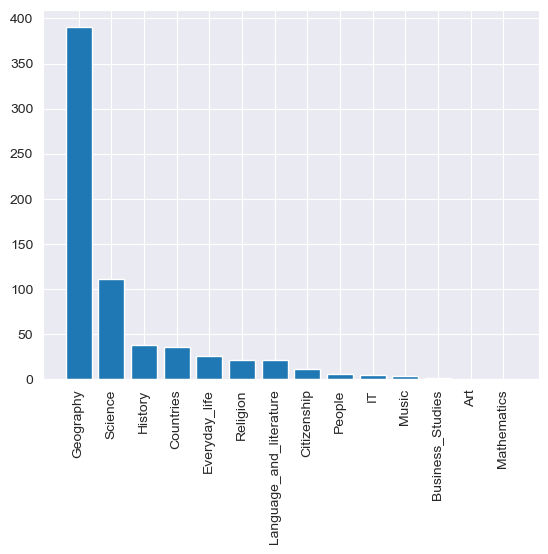

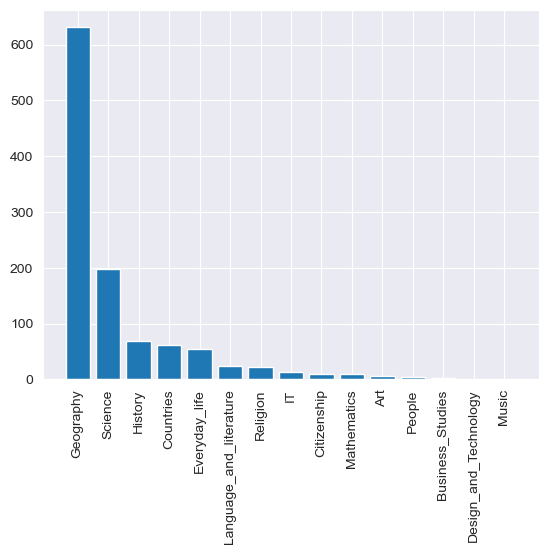

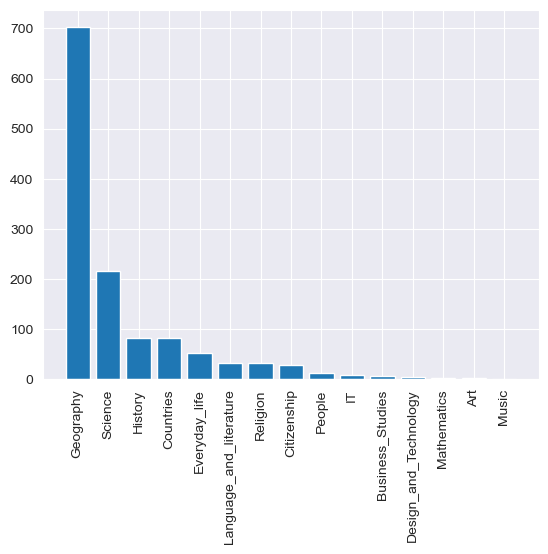

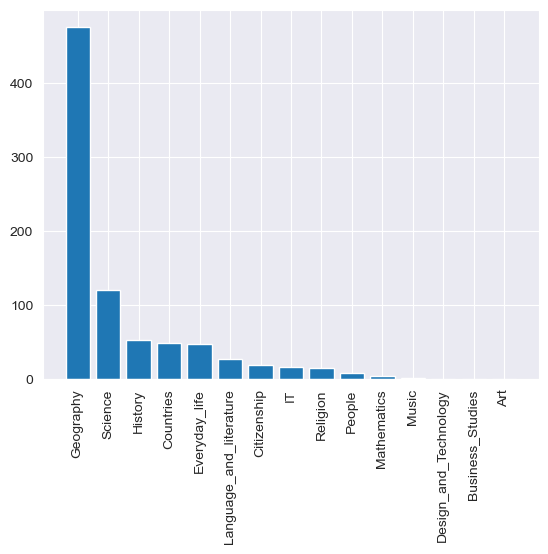

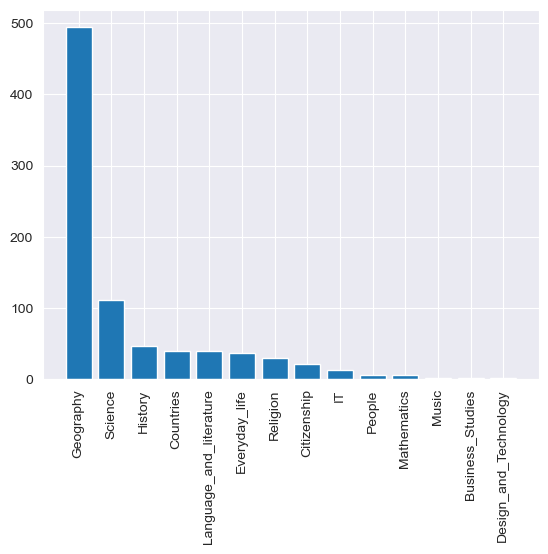

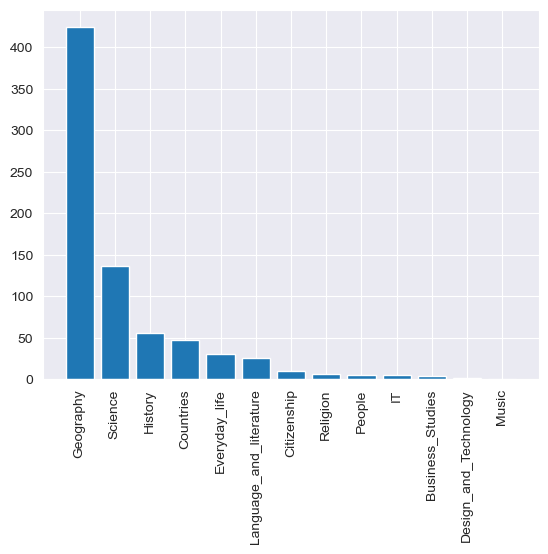

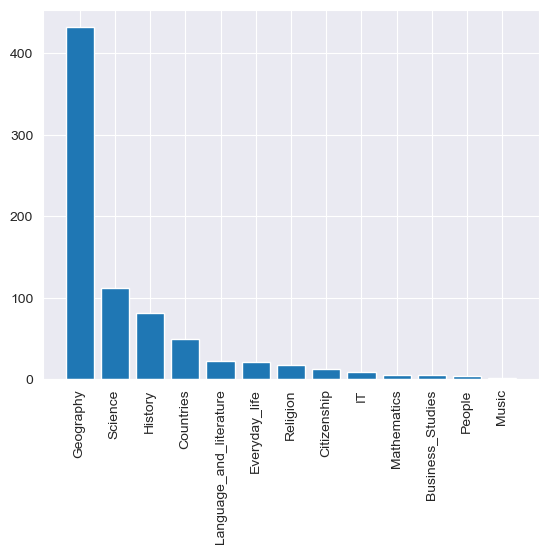

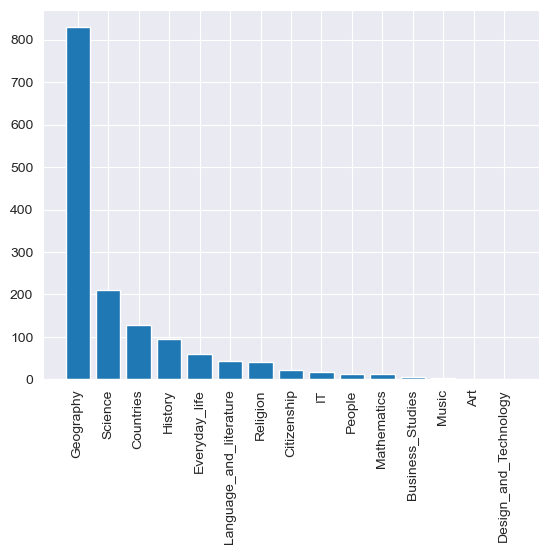

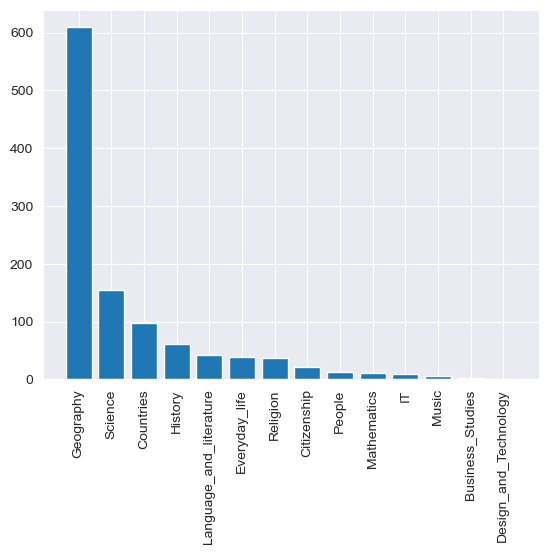

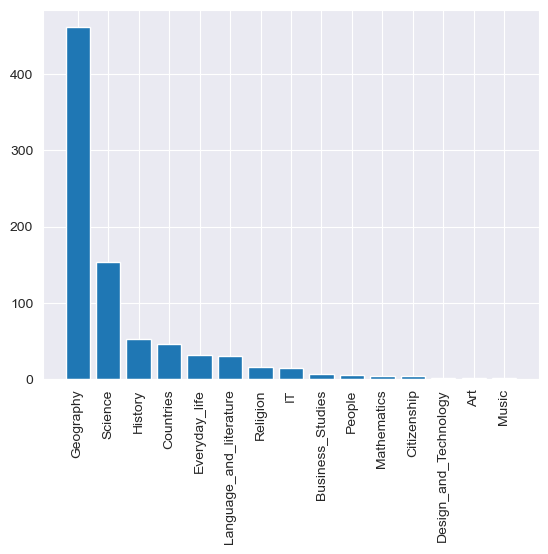

In [9]:
# divide the periods into 3 months
from datetime import datetime
finished_paths["seconds"] = finished_paths["timestamp"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp())
period = finished_paths["seconds"].max() - finished_paths["seconds"].min()
nb_divisions = 60
division = period / nb_divisions
#sort data by timestamp
min = finished_paths["seconds"].min()
finished_paths = finished_paths.sort_values("seconds")
finished_paths["period"] = (finished_paths["seconds"] - min) // division
for i in range(nb_divisions):
    hubs_count = finished_paths[finished_paths["period"] == i]["hub_category"].value_counts()
    #plot the hubs
    plt.bar(hubs_count.index, hubs_count.values)
    plt.xticks(rotation=90)
    plt.show()

In [10]:
target_science = finished_paths[finished_paths["target_general_category"] == "Everyday_life"]
visited_categories = {}
for period in range(16):
    for index, row in target_science[target_science["period"] == period].iterrows():
        for article in row["clean_path"][1:]:
            category = categories_dict.get(article, "None")
            print(category)
            if category == "['Everyday_life', 'Sports_events']":
                if article not in visited_categories:
                    visited_categories[article] = 0
                visited_categories[article] += 1
    #sort and plot
    visited_categories = dict(sorted(visited_categories.items(), key=lambda item: item[1], reverse=True))
    
    plt.bar(list(visited_categories.keys())[:20], list(visited_categories.values())[:20])
    plt.xticks(rotation=90)
    plt.yscale("log")
    plt.show()

History
Geography
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Science
Citizenship
Everyday_life
Geography
Everyday_life
Everyday_life
Science
Science
Everyday_life
History
People
People
Everyday_life
Science
Science
Science
Science
Science
Science
Citizenship
Countries
Science
Science
Science
Citizenship
Countries
Science
Science
Science
Countries
Geography
Citizenship
Citizenship
Everyday_life
History
Geography
Everyday_life
Geography
Everyday_life
Geography
Everyday_life
Geography
Geography
Geography
Everyday_life
Everyday_life
Science
Everyday_life
Geography
Everyday_life
Language_and_literature
Everyday_life
Everyday_life
Art
Everyday_life
Everyday_life
Geography
Art
Art
Everyday_life
Everyday_life
Science
Science
Science
Science
Everyday_life
Science
Science
Science
Everyday_life
Science
Science
Geography
Everyday_life
Everyday_life
Science
Science
Everyday_life
Geography
Everyday_life
Everyday_life
Science


ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

History
Geography
Religion
Religion
Religion
Science
Everyday_life
Science
Art
Everyday_life
History
Everyday_life
Everyday_life
Science
Science
Geography
Geography
Everyday_life
Religion
People
Citizenship
Science
Everyday_life
Geography
Geography
Geography
Geography
Science
Geography
Countries
Everyday_life
Science
Science
Geography
Everyday_life
Science
Countries
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Science
Geography
Geography
Everyday_life
Everyday_life
Science
Countries
Everyday_life
Geography
History
Science
Science
Science
Religion
Everyday_life
Geography
IT
Everyday_life
Everyday_life
Everyday_life
Geography
Countries
Everyday_life
Everyday_life
Science
Science
Geography
Geography
Science
Science
Everyday_life
Science
Science
Everyday_life
Science
Everyday_life
Science
Science
Everyday_life
Countries
Geography
Geography
Countries
Everyday_life
Geography
Geography
Countries
Everyday_life
Science
Science
Science
Science
Everyday_life
Everyday_life
Everyday_life

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

People
Geography
Everyday_life
Science
Science
Everyday_life
Everyday_life
Science
Geography
Geography
Countries
Everyday_life
Everyday_life
Science
Everyday_life
Science
Science
Science
Science
Everyday_life
Everyday_life
Science
Everyday_life
Science
Science
Science
Science
Everyday_life
Everyday_life
Science
Geography
Geography
Countries
Everyday_life
History
Geography
Citizenship
Countries
Countries
Everyday_life
Citizenship
Science
Geography
Citizenship
Countries
Everyday_life
Everyday_life
Science
Science
Science
Science
Everyday_life
Science
Science
Science
Science
Science
Science
Science
Science
Science
Science
Science
Everyday_life
Science
Science
Everyday_life
Everyday_life
Science
Everyday_life
Science
History
Countries
Business_Studies
Science
Science
Science
Science
Science
Science
Science
Everyday_life
Everyday_life
Science
Everyday_life
Science
Science
Everyday_life
Science
Science
Science
Science
Science
Everyday_life
Science
Science
Everyday_life
History
Countries
Hist

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Everyday_life
Science
Science
Science
Science
Science
Science
Everyday_life
Science
Science
Science
Science
Science
Science
Geography
Citizenship
Geography
Geography
Science
Religion
Science
Science
Science
Geography
Science
Science
Science
Science
Science
Science
Everyday_life
Science
Science
Science
Science
Science
Geography
Geography
Geography
Geography
Countries
Geography
Countries
Everyday_life
Science
Science
Science
Everyday_life
Geography
Geography
Countries
Everyday_life
Everyday_life
Science
Everyday_life
Everyday_life
Science
Science
Science
Science
Science
Science
Science
Countries
Everyday_life
Everyday_life
Science
History
Science
Science
Science
Everyday_life
Science
Everyday_life
History
History
Geography
History
Geography
Geography
Science
History
History
Geography
History
Geography
Geography
Science
Everyday_life
Geography
Science
Science
Science
Science
Science
Science
Everyday_life
Everyday_life
Everyday_life
Science
Science
Everyday_life
Science
Language_and_litera

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Citizenship
Geography
Countries
Everyday_life
Citizenship
Geography
Countries
Everyday_life
Science
Science
Science
Science
Science
Geography
Science
Science
Geography
History
Geography
Geography
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Business_Studies
Everyday_life
Everyday_life
Science
Everyday_life
Everyday_life
Everyday_life
Geography
Everyday_life
Everyday_life
Science
People
Countries
Everyday_life
Everyday_life
Everyday_life
Geography
Geography
Everyday_life
Science
Everyday_life
Science
Everyday_life
Science
Science
Everyday_life
Geography
Science
Science
Science
Science
Everyday_life
Geography
Geography
Art
Science
Science
Science
Science
Everyday_life
Geography
Geography
Art
Science
Science
Science
Science
Everyday_life
Countries
Everyday_life
Science
Science
Science
Science
Everyday_life
Countries
Everyday_life
Science
Science
Science
Science
Everyday_life
Geography
Geography
Geography
Geography
Everyday_life
Geography
Everyday_life
Science
Science
Geography


ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Countries
Science
Geography
Geography
Citizenship
Everyday_life
Citizenship
Citizenship
Geography
Geography
Everyday_life
Citizenship
Citizenship
Geography
Geography
Everyday_life
Language_and_literature
Geography
Geography
History
Everyday_life
Everyday_life
People
Science
Science
Science
Science
Language_and_literature
Everyday_life
Language_and_literature
Everyday_life
Geography
Science
Science
Science
Everyday_life
Geography
Geography
Geography
Geography
Geography
Everyday_life
Geography
Everyday_life
Everyday_life
Everyday_life
Language_and_literature
Everyday_life
Everyday_life
Citizenship
Geography
Everyday_life
History
Everyday_life
Everyday_life
Citizenship
Geography
Everyday_life
History
Everyday_life
Everyday_life
Geography
Everyday_life
Science
Science
Geography
Everyday_life
Science
Science
Everyday_life
Geography
Everyday_life
Everyday_life
Geography
Everyday_life
Geography
Everyday_life
Citizenship
Everyday_life
Everyday_life
Geography
Everyday_life
Geography
Everyday_li

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Art
Science
Art
Science
Art
Science
Geography
Geography
Geography
Science
Science
Science
Citizenship
Everyday_life
Geography
Everyday_life
Everyday_life
Countries
Science
Science
Science
Science
Science
Everyday_life
Language_and_literature
Geography
Everyday_life
Citizenship
Everyday_life
History
Geography
Geography
Geography
Language_and_literature
Geography
Geography
Geography
Everyday_life
History
Geography
Geography
Geography
Language_and_literature
Geography
Geography
Geography
Everyday_life
Geography
Geography
Everyday_life
Geography
Geography
Everyday_life
Geography
Language_and_literature
Language_and_literature
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Geography
Language_and_literature
Language_and_literature
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Geography
Geography
Everyday_life
Everyday_life
Everyday_life
Science
Science
Science
Everyday_life
Science
Science
Everyday_life
Science
Everyday_life
Science
Science
Hist

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Countries
Science
Science
Science
Everyday_life
Everyday_life
Science
Science
Everyday_life
Everyday_life
Everyday_life
Geography
Everyday_life
Everyday_life
Everyday_life
Countries
Geography
Citizenship
Geography
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Science
Science
Science
History
Geography
Citizenship
Countries
Everyday_life
Everyday_life
Geography
Geography
Geography
Geography
Everyday_life
Science
Everyday_life
Science
Science
Science
Everyday_life
Science
Science
Science
Science
Geography
Everyday_life
Citizenship
Everyday_life
Everyday_life
Science
Science
Everyday_life
Science
Science
Science
Geography
Everyday_life
Science
Everyday_life
Citizenship
Geography
Citizenship
Business_Studies
Mathematics
Everyday_life
Geography
Geography
Everyday_life
Everyday_life
Science
Science
Everyday_life
Religion
Religion
Religion
IT
Mathematics
Citizenship
Language_and_literature
Science
Everyday_life
Geography
Science
Everyday_life
Religion
Geography
Geography
Geography
Ge

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Geography
History
People
Geography
Geography
Everyday_life
Everyday_life
Geography
Geography
Geography
Geography
Everyday_life
Geography
Geography
Geography
Geography
Everyday_life
Science
Science
Countries
Countries
Everyday_life
Science
Language_and_literature
Geography
Geography
Everyday_life
Science
Science
Science
Everyday_life
Science
Geography
Geography
Geography
Geography
Everyday_life
Geography
Everyday_life
Science
Everyday_life
Science
Everyday_life
Everyday_life
Science
Geography
Geography
Everyday_life
Everyday_life
Religion
Everyday_life
Everyday_life
Science
Everyday_life
Everyday_life
Religion
Everyday_life
Everyday_life
Science
Everyday_life
Everyday_life
Geography
History
Everyday_life
Everyday_life
Everyday_life
Geography
Geography
Geography
Geography
Everyday_life
Religion
Geography
Citizenship
Geography
Everyday_life
Religion
Geography
Citizenship
Geography
Everyday_life
Geography
Geography
People
Language_and_literature
Everyday_life
Geography
Everyday_life
Geogra

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Geography
Everyday_life
Everyday_life
Science
Science
Science
Science
Geography
Science
Science
Science
Everyday_life
Everyday_life
Science
Science
Science
Science
Science
Science
Science
Everyday_life
Everyday_life
Geography
Everyday_life
Geography
Everyday_life
Everyday_life
Everyday_life
Geography
Everyday_life
Countries
Geography
Everyday_life
Science
Science
People
Science
Geography
Geography
Language_and_literature
Science
Science
Everyday_life
Language_and_literature
Science
Science
Science
Science
Geography
Everyday_life
Geography
Geography
Everyday_life
Geography
Geography
Everyday_life
Everyday_life
Everyday_life
Citizenship
Geography
Geography
Everyday_life
Everyday_life
People
Everyday_life
Everyday_life
Everyday_life
Geography
Geography
Geography
Everyday_life
Science
Science
Science
Countries
Geography
Countries
Everyday_life
Countries
Geography
Countries
Everyday_life
History
People
Religion
Science
Science
Everyday_life
Science
Science
Science
Science
Science
Science
Sc

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Everyday_life
Science
Science
Everyday_life
Geography
Geography
History
Everyday_life
Design_and_Technology
Everyday_life
IT
Business_Studies
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Geography
Everyday_life
Everyday_life
Geography
Everyday_life
Everyday_life
Everyday_life
Geography
Everyday_life
Everyday_life
Everyday_life
Geography
Science
Geography
Geography
Geography
Citizenship
Everyday_life
Science
Science
Everyday_life
Religion
Religion
Geography
Everyday_life
Religion
Religion
Geography
Everyday_life
Science
Science
Everyday_life
Geography
Geography
Geography
Everyday_life
Geography
Everyday_life
Science
Science
Everyday_life
Science
Everyday_life
Science
Science
Everyday_life
Science
Everyday_life
History
Language_and_literature
Everyday_life
Science
Science
People
Geography
Geography
Everyday_life
Everyday_life
Geography
Language_and_literature
Geography
Everyday_life
Science
Science
Geography
Science
Science
Everyday_life
Everyday_life
Everyday_life
Science
Sci

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Geography
Geography
Everyday_life
Citizenship
History
Geography
Everyday_life
Everyday_life
Science
Science
Science
Science
Geography
Geography
Everyday_life
Everyday_life
Design_and_Technology
Science
Science
Science
Everyday_life
Everyday_life
Science
Science
Everyday_life
Science
Science
Everyday_life
Geography
Everyday_life
Geography
Geography
Everyday_life
People
Geography
Geography
Geography
Everyday_life
Science
Geography
People
Language_and_literature
Everyday_life
Science
Countries
Geography
Countries
Science
Science
Science
History
Countries
Design_and_Technology
IT
Everyday_life
Everyday_life
Everyday_life
Geography
Geography
Everyday_life
Everyday_life
Everyday_life
Countries
Everyday_life
History
Countries
Design_and_Technology
IT
Everyday_life
Everyday_life
Everyday_life
Science
Science
Science
Science
Science
Science
Geography
Science
Science
Science
Everyday_life
Science
Language_and_literature
Countries
Science
Science
Science
Science
Science
Science
Science
Everyday_l

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

People
Geography
Everyday_life
Everyday_life
People
Geography
Everyday_life
Everyday_life
Everyday_life
Citizenship
Citizenship
Citizenship
Geography
Geography
Everyday_life
Geography
Everyday_life
Geography
Everyday_life
History
Geography
Everyday_life
Everyday_life
Everyday_life
History
Geography
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Geography
Everyday_life
Everyday_life
Science
Everyday_life
Geography
Business_Studies
Business_Studies
Science
Everyday_life
History
Countries
Everyday_life
Everyday_life
History
Countries
Everyday_life
Everyday_life
Geography
Geography
Countries
Design_and_Technology
IT
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Science
Science
Everyday_life
IT
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Science
Everyday_life
Music
Everyday_life
Music
Art
Everyday_life
Geography
Geography
Geography
Geography
Everyday_life
Science
Everyday_life
Science
Science
Everyday_life
Science
Science
Science
Science
Science
Science
Scienc

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Science
Everyday_life
Science
Everyday_life
Everyday_life
Design_and_Technology
Geography
Science
Science
Everyday_life
Science
Science
Everyday_life
Everyday_life
Everyday_life
Geography
Everyday_life
Everyday_life
Science
Science
Science
Everyday_life
Everyday_life
Science
History
Geography
People
Language_and_literature
Everyday_life
Religion
Everyday_life
Science
Science
Science
Everyday_life
Music
Geography
Everyday_life
Everyday_life
Science
Science
Everyday_life
Religion
Science
Everyday_life
Science
Science
Science
Art
Science
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Geography
Countries
Everyday_life
Citizenship
Everyday_life
Everyday_life
Geography
People
Geography
Science
Science
Everyday_life
Geography
Countries
Business_Studies
Design_and_Technology
IT
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Geography
Countries
Language_and_literature
IT
Everyday_life
Everyday_life
Everyday_life
Everyday_

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Science
Science
Everyday_life
Science
Science
Everyday_life
Geography
Everyday_life
Everyday_life
Everyday_life
Geography
Everyday_life
Everyday_life
Geography
Geography
Everyday_life
Everyday_life
Everyday_life
Science
Science
Science
Everyday_life
Everyday_life
Science
Science
Design_and_Technology
Science
Art
Science
Language_and_literature
Language_and_literature
Geography
Geography
Everyday_life
Citizenship
Geography
Everyday_life
Everyday_life
Geography
Geography
Everyday_life
Everyday_life
Everyday_life
Science
Science
Business_Studies
Business_Studies
Geography
History
Everyday_life
Geography
Science
Science
Science
Science
Science
Geography
History
Everyday_life
Geography
Geography
Everyday_life
Geography
Geography
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Geography
Everyday_life
Geography
Everyday_life
Science
Science
Everyday_life
Science
Geography
Music
Everyday_life
Geography
Geography
Science
Geography
Geography
Geography
Everyday_life
Everyday

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

Science
Everyday_life
Science
Science
Everyday_life
Science
Everyday_life
History
Geography
Everyday_life
Everyday_life
Everyday_life
History
Geography
Everyday_life
Everyday_life
Everyday_life
People
Language_and_literature
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Language_and_literature
Science
Science
Science
Everyday_life
Everyday_life
Everyday_life
Design_and_Technology
Design_and_Technology
IT
IT
Geography
Geography
Geography
Geography
Geography
Everyday_life
Language_and_literature
People
Language_and_literature
People
Language_and_literature
Everyday_life
Everyday_life
Geography
Everyday_life
Science
Everyday_life
Geography
Everyday_life
Science
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Mathematics
Mathematics
Everyday_life
Everyday_life
Science
Geography
Geography
Business_Studies
Everyday_life
Citizenship
Mathematics
Mathematics
Everyday_life
Everyday_life
Everyday_life
Everyday_life
Language

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>